In [10]:
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
import gc
import collections
import pandas as pd
%matplotlib inline

regex1 = r"\d+"
regex2 = r"c\d+"
X = np.zeros((10000,1000)) #1.000x10.000 matrix

In [11]:
#load data
with open("../Exercise 1/data_train.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        X[row_i,col_i] = int(row[1])

In [12]:
# returns array of training data and an array of test data
def cv(X, k=5):
    # split indices of nonz-zero values in k sets but randomly!
    nzR, nzC = np.nonzero(X)
    zipped = list(zip(nzR,nzC))
    np.random.shuffle(zipped)
    nzR, nzC = zip(*zipped)
    nzRsplit = np.array_split(nzR, k)
    nzCsplit = np.array_split(nzC, k)
     
    X_train_sets = []
    X_test_sets = []
    for i in range(k):
        X_train = np.copy(X)
        X_train[(nzRsplit[i], nzCsplit[i])] = 0
        #print('X_train has ', np.count_nonzero(X_train), ' non-zeros.')
        X_train_sets.append(X_train)
    
        X_test = np.zeros(X.shape)
        X_test[(nzRsplit[i], nzCsplit[i])] = X[(nzRsplit[i], nzCsplit[i])]
        #print('X_test has ', np.count_nonzero(X_test), ' non-zeros.')
        X_test_sets.append(X_test)
        
    return X_train_sets, X_test_sets

# get RMSE error
def rmse(I,X,Z,U):
    return np.sqrt(np.sum((I * (X - np.dot(U,Z.T)))**2)/len(X[X > 0]))

In [13]:
D,N = X.shape
print('X: ',X.shape)
K = 25
U = np.random.rand(D,K)
Z = np.random.rand(N,K)
n_epochs = 5*(10**6)  #30
lmda = 0.00001       
gamma = 0.0001       # step size

#train_errors = {k: [] for k in range(n_epochs)}
#test_errors = {k: [] for k in range(n_epochs)}
train_errors = collections.defaultdict(list)
test_errors = collections.defaultdict(list)
#for it in range(5):
#    for epoch in range(n_epochs):
#        train_errors[epoch].append(it*epoch)           
#for epoch in range(n_epochs):
#    print 'epoch: ', epoch, ', ', train_errors[epoch]

X:  (10000, 1000)


In [14]:
# with CV
X_train_set, X_test_set = cv(X, k=5)
collect_each = 500000
for cv_iter, (X_train, X_test) in enumerate(zip(X_train_set, X_test_set)):
    I = X_train.copy()
    I[I > 0] = 1
    I2 = X_test.copy()
    I2[I2 > 0] = 1
    
    #DO SGD
    ds,ns = X_train.nonzero()
    #print('Nonzeros: ', len(ds))
    #break
    #print 'Users: ',users.shape
    #print 'Movies: ', movies.shape
    print('CV iter = ', cv_iter)
    
    # generate random indeces
    indices = np.random.randint(low=0, high=len(ds), size=n_epochs)
    zipped_ds_ns = list(zip(ds,ns))
    
    for epoch in range(n_epochs):
        if epoch % collect_each == 0:
            print('epoch = ', epoch)
            
        (d, n) = zipped_ds_ns[indices[epoch]]
        #for d, n in zip(ds,ns):
        #gamma = 0.001*(1.0/(np.sqrt(epoch+1.0)))
        gamma = (1e-3)*(1.0/(np.sqrt(epoch/1e6+1.0)))
        #e = R[u, i] - prediction(U[:,u],Z[:,i])
        e = X_train[d, n] - np.dot(U[d,:],Z[n,:].T)
        U[d,:] += gamma * ( e * Z[n,:].T - lmda*U[d,:] )
        Z[n,:] += gamma * ( e * U[d,:] - lmda*Z[n,:] )
        if epoch % collect_each == 0:
            train_rmse = rmse(I,X_train,Z,U) # Calculate root mean squared error from train dataset
            test_rmse = rmse(I2,X_test,Z,U) # Calculate root mean squared error from test dataset
            train_errors[epoch].append(train_rmse)
            test_errors[epoch].append(test_rmse)
            gc.collect()

CV iter =  0
epoch =  0
epoch =  500000
epoch =  1000000
epoch =  1500000
epoch =  2000000
epoch =  2500000
epoch =  3000000
epoch =  3500000
epoch =  4000000
epoch =  4500000
CV iter =  1
epoch =  0
epoch =  500000
epoch =  1000000
epoch =  1500000
epoch =  2000000
epoch =  2500000
epoch =  3000000
epoch =  3500000
epoch =  4000000
epoch =  4500000
CV iter =  2
epoch =  0
epoch =  500000
epoch =  1000000
epoch =  1500000
epoch =  2000000
epoch =  2500000
epoch =  3000000
epoch =  3500000
epoch =  4000000
epoch =  4500000
CV iter =  3
epoch =  0
epoch =  500000
epoch =  1000000
epoch =  1500000
epoch =  2000000
epoch =  2500000
epoch =  3000000
epoch =  3500000
epoch =  4000000
epoch =  4500000
CV iter =  4
epoch =  0
epoch =  500000
epoch =  1000000
epoch =  1500000
epoch =  2000000
epoch =  2500000
epoch =  3000000
epoch =  3500000
epoch =  4000000
epoch =  4500000


In [24]:
# Without CV

collect_each = 50000

I = X.copy()
I[I > 0] = 1

#DO SGD
ds,ns = X.nonzero()

# generate random indeces
indices = np.random.randint(low=0, high=len(ds), size=n_epochs)
zipped_ds_ns = list(zip(ds,ns))

for epoch in range(n_epochs):
    if epoch % collect_each == 0:
        print('epoch = ', epoch)

    (d, n) = zipped_ds_ns[indices[epoch]]

    gamma = (1e-3)*(1.0/(np.sqrt(epoch/1e6+1.0)))
    e = X[d, n] - np.dot(U[d,:],Z[n,:].T)
    U[d,:] += gamma * ( e * Z[n,:].T - lmda*U[d,:] )
    Z[n,:] += gamma * ( e * U[d,:] - lmda*Z[n,:] )
    if epoch % collect_each == 0:
        train_rmse = rmse(I,X_train,Z,U) # Calculate root mean squared error from train dataset
        #test_rmse = rmse(I2,X_test,Z,U) # Calculate root mean squared error from test dataset
        train_errors[epoch].append(train_rmse)
        #test_errors[epoch].append(test_rmse)
        gc.collect()

epoch =  0
epoch =  50000
epoch =  100000
epoch =  150000
epoch =  200000
epoch =  250000
epoch =  300000
epoch =  350000
epoch =  400000
epoch =  450000
epoch =  500000
epoch =  550000
epoch =  600000
epoch =  650000
epoch =  700000
epoch =  750000
epoch =  800000
epoch =  850000
epoch =  900000
epoch =  950000


In [15]:
print(len(train_errors.keys()))
tr_err = collections.defaultdict(int)
ts_err = collections.defaultdict(int)
for collected_epoch in train_errors.keys():
    tr_err[collected_epoch] = np.mean(train_errors[collected_epoch]) 
    ts_err[collected_epoch] = np.mean(test_errors[collected_epoch]) 
    
print(len(tr_err))   
print(len(ts_err))

10
10
10


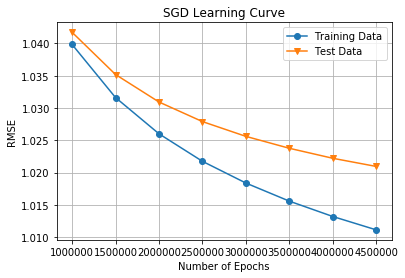

In [16]:
tr_err_lst = sorted(tr_err.items())
ts_err_lst = sorted(ts_err.items())
x, y = zip(*tr_err_lst)
plt.plot(x[2:], y[2:], marker='o', label='Training Data');
x, y = zip(*ts_err_lst)
plt.plot(x[2:], y[2:], marker='v', label='Test Data');
plt.title('SGD Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.savefig('sgd_learning_curve_K='+str(K))
plt.show()


In [28]:
#now lets predict the data from samplesubmission
fout = open('mysubmission.csv', 'w')
fout.write("Id,Prediction\n")
with open("../Exercise 1/SampleSubmission.csv") as csvfile:
    readCSV = csv.reader(csvfile,delimiter=',')
    next(readCSV) #discard header
    for row in readCSV:
        match = re.search(regex1,row[0])
        match2 = re.search(regex2,row[0])
        row_i = int(match.group(0))-1
        col_i = int(match2.group(0)[1:]) -1
        calc = np.dot(U[row_i,:], Z[col_i,:].T)
        #print(calc)
        fout.write(row[0]+","+str(calc)+"\n")
    fout.close()

NameError: name 'prediction' is not defined

In [7]:
for epoch in range(20):
    old_gamma = (1e-3)*(1.0/(np.sqrt(epoch+1.0)))
    print(old_gamma)
    
print()
for epoch in range(20*(10**6)):
    if epoch % (10**5) == 0:
        new_gamma = (1e-3)*(1.0/(np.sqrt(epoch/1e6+1.0)))
        print(new_gamma)

0.001
0.000707106781187
0.00057735026919
0.0005
0.0004472135955
0.000408248290464
0.000377964473009
0.000353553390593
0.000333333333333
0.000316227766017
0.000301511344578
0.000288675134595
0.000277350098113
0.000267261241912
0.000258198889747
0.00025
0.000242535625036
0.000235702260396
0.000229415733871
0.00022360679775

0.001
0.000953462589246
0.000912870929175
0.000877058019307
0.000845154254729
0.000816496580928
0.000790569415042
0.000766964988847
0.0007453559925
0.00072547625011
0.000707106781187
0.000690065559342
0.000674199862463
0.000659380473396
0.000645497224368
0.000632455532034
0.000620173672946
0.00060858061945
0.000597614304667
0.000587220219515
0.00057735026919
0.000567961834247
0.000559016994375
0.000550481882563
0.000542326144547
0.000534522483825
0.000527046276695
0.00051987524491
0.000512989176043
0.000506369683542
0.0005
0.000493864798325
0.000487950036474
0.00048224282217
0.000476731294623
0.000471404520791
0.00046625240412
0.000461265604014
0.000456435464588
0.000